In [1]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from plotting_utils import render_in_latex

In [2]:
# Render plots in LaTeX
# render_in_latex()

In [3]:
entity_name = "sketchy-opts"
project_name = "homo_full_krr"

In [4]:
api = wandb.Api()

In [5]:
runs = api.runs(f"{entity_name}/{project_name}")

In [6]:
def plot_runs(runs, r, opts, precisions):
    r_runs = []

    for run in runs:
        precond_params = run.config["precond_params"]
        if precond_params is not None:
            if precond_params["r"] == r:
                r_runs.append(run)

    plt.figure()

    for run in r_runs:
        if run.config["opt"] in opts and run.config["precision"] in precisions:
            smape_df = run.history(samples=1000000000, keys=["smape"])
            times_df = run.history(samples=1000000000, keys=["iter_time"])

            steps = smape_df["_step"].to_numpy()
            cum_times = np.cumsum(times_df["iter_time"].to_numpy())

            label = run.config["opt"]
            if run.config["opt"] in ["skotch", "askotch"]:
                label += ", b="
                label += str(run.config["b"])
            elif run.config["opt"] == "pcg":
                label += ", "
                label += run.config["precond_params"]["type"]

            plt.plot(cum_times[steps], smape_df["smape"], label=label)

    plt.ylim(0, 0.25)
    plt.title(f"rank = {r}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("SMAPE")
    plt.legend()

In [7]:
rs = [10, 20, 50, 100, 200, 500, 1000, 2000]
opts = ["askotch", "pcg"]
precisions = ["float32"]

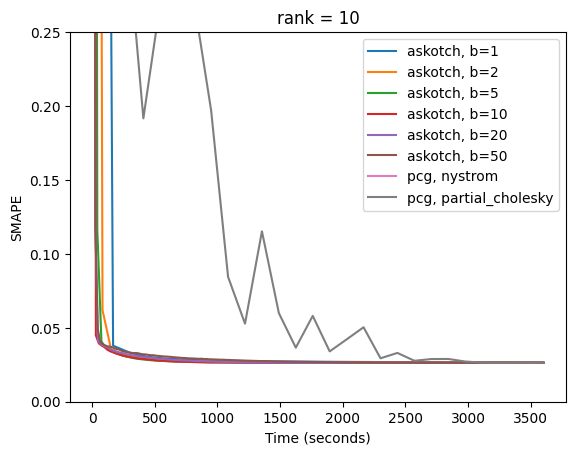

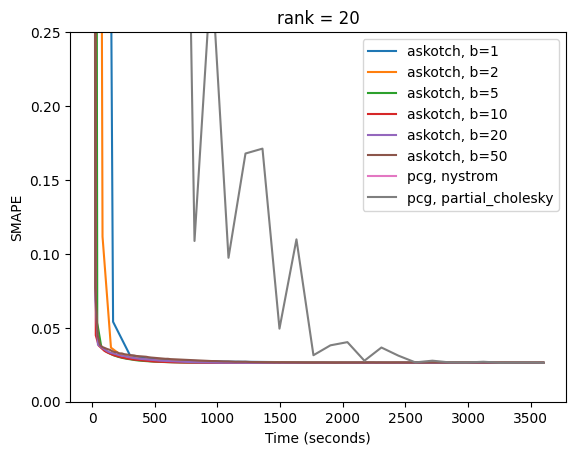

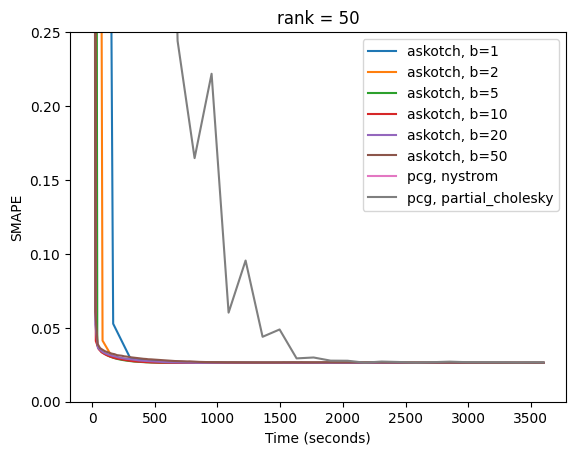

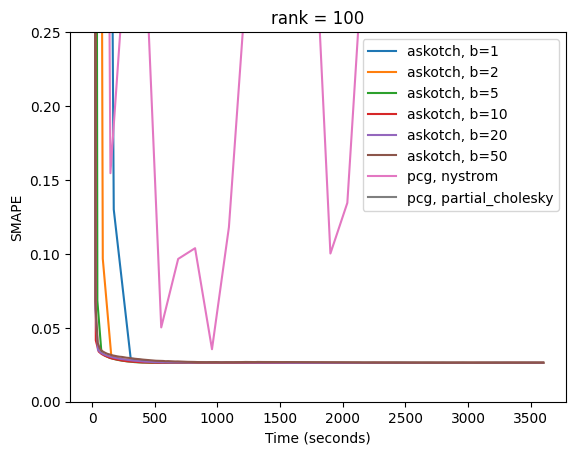

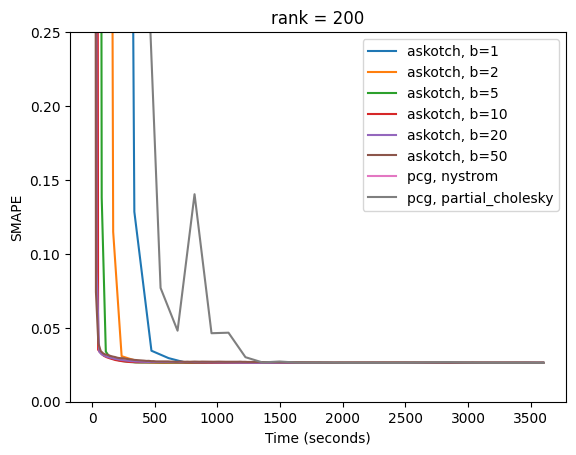

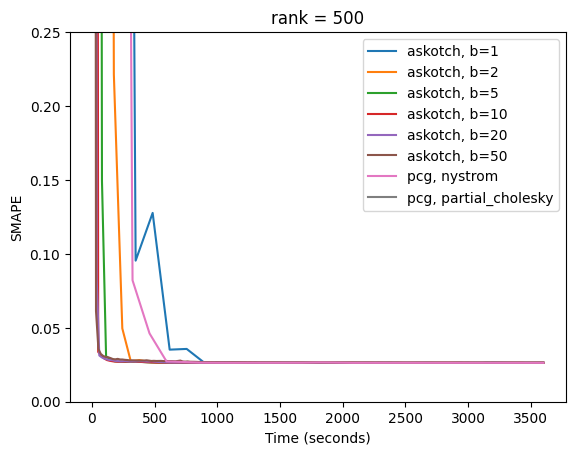

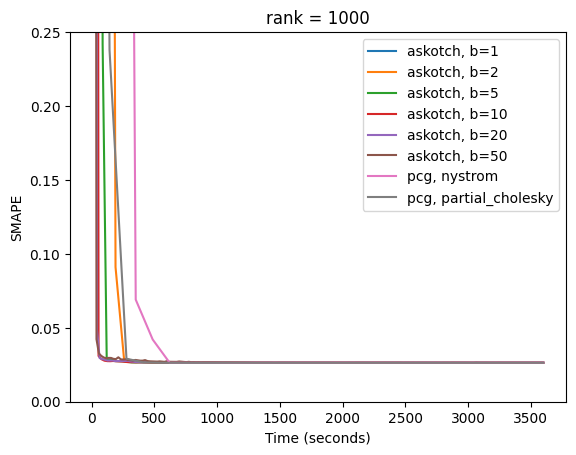

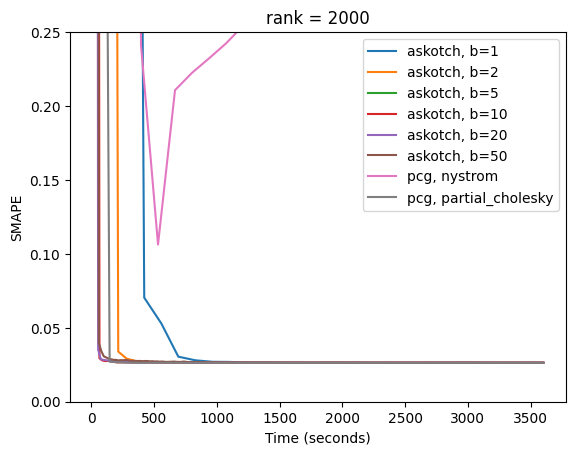

In [8]:
for r in rs:
    plot_runs(runs, r, opts, precisions)